In [8]:
library(survival)
library(ggplot2)
library(survminer)
library(survMisc)

Loading required package: ggpubr
Loading required package: magrittr

Attaching package: ‘survMisc’

The following object is masked from ‘package:ggplot2’:

    autoplot



## Get the data scraped through Python

### Wave complex

In [9]:
df = read.csv("data_base", header=TRUE) #expression data for wave complex

In [10]:
head(df)

X,expressionNCKAP1,expressionCYFIP2,expressionNCKAP1L,expressionWASF2,expressionABI3,expressionWASF3,expressionABI1,expressionABI2,expressionCYFIP1,expressionWASF1,expressionBRK1,survival,event
0,17.61,16.41,14.69,20.28,16.10,15.46,17.68,15.84,18.34,14.41,20.59,4047,0
1,17.15,15.33,16.06,18.06,17.74,15.77,18.12,15.85,17.89,15.20,21.15,4005,0
2,16.70,16.09,16.10,19.24,16.71,14.70,18.47,15.53,17.82,15.06,21.31,1474,0
3,17.27,14.59,15.38,19.12,16.70,14.51,18.12,16.11,18.43,16.05,21.59,1448,0
4,17.11,16.21,15.67,19.44,16.39,15.60,18.34,16.26,17.93,16.86,21.63,348,0
5,16.94,15.40,16.34,19.60,17.45,14.49,18.24,15.81,18.41,14.93,21.67,1477,0


### Plot the data

In [11]:
fit <- survfit(Surv(survival, event) ~ 1,  type="kaplan-meier", conf.type="log", data=df)

Warning message in .pvalue(fit, data = data, method = method, pval = pval, pval.coord = pval.coord, :
“There are no survival curves to be compared. 
 This is a null model.”

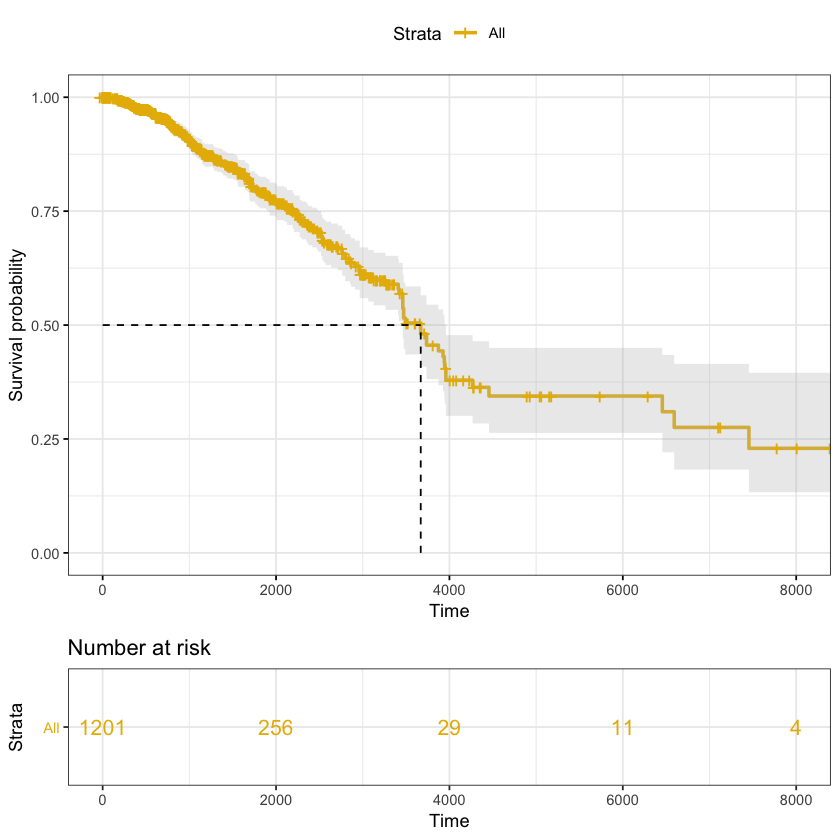

In [12]:
# Change color, linetype by strata, risk.table color by strata
ggsurvplot(fit,
          pval = TRUE, conf.int = TRUE,
          risk.table = TRUE, # Add risk table
          risk.table.col = "strata", # Change risk table color by groups
          linetype = "strata", # Change line type by groups
          surv.median.line = "hv", # Specify median survival
          ggtheme = theme_bw(), # Change ggplot2 theme
          palette = c("#E7B800", "#2E9FDF"))

## Cox regression

In [13]:
res.cox1 <- coxph(Surv(survival, event) ~ expressionNCKAP1 + expressionCYFIP2 + expressionNCKAP1L + expressionWASF2 + expressionABI3 + expressionWASF3 + expressionABI1 + expressionABI2 + expressionCYFIP1 + expressionWASF1 + expressionBRK1, data =  df)

In [14]:
#res.cox2 <- coxph(Surv(survival, event) ~ expressionNCKAP1 + expressionARPIN + strata(expressionPICK1) + expressionWASF1 + expressionCYFIP1 + expressionABI1 + expressionBRK1, data =  df)

In [15]:
summary(res.cox1)

Call:
coxph(formula = Surv(survival, event) ~ expressionNCKAP1 + expressionCYFIP2 + 
    expressionNCKAP1L + expressionWASF2 + expressionABI3 + expressionWASF3 + 
    expressionABI1 + expressionABI2 + expressionCYFIP1 + expressionWASF1 + 
    expressionBRK1, data = df)

  n= 1203, number of events= 200 

                      coef exp(coef) se(coef)      z Pr(>|z|)  
expressionNCKAP1   0.44001   1.55273  0.19850  2.217   0.0266 *
expressionCYFIP2  -0.08283   0.92051  0.06561 -1.262   0.2068  
expressionNCKAP1L -0.09089   0.91312  0.10714 -0.848   0.3963  
expressionWASF2    0.07568   1.07861  0.13839  0.547   0.5845  
expressionABI3     0.08726   1.09118  0.15198  0.574   0.5659  
expressionWASF3    0.04799   1.04916  0.05947  0.807   0.4197  
expressionABI1    -0.09773   0.90689  0.17520 -0.558   0.5770  
expressionABI2    -0.22464   0.79880  0.16110 -1.394   0.1632  
expressionCYFIP1   0.25904   1.29568  0.19608  1.321   0.1865  
expressionWASF1    0.07887   1.08206  0.06937  1.137  

In [16]:
summary(res.cox1)$coef

,coef,exp(coef),se(coef),z,Pr(>|z|)
expressionNCKAP1,0.44001491,1.5527304,0.19849859,2.2167155,0.02664254
expressionCYFIP2,-0.08282589,0.9205114,0.06560595,-1.2624753,0.20677782
expressionNCKAP1L,-0.09088632,0.9131215,0.10713513,-0.8483336,0.39625222
expressionWASF2,0.07567565,1.0786127,0.13838644,0.5468430,0.58448661
expressionABI3,0.08726363,1.0911843,0.15198144,0.5741729,0.56585077
expressionWASF3,0.04799246,1.0491627,0.05947077,0.8069925,0.41967082
expressionABI1,-0.09772989,0.9068938,0.17520212,-0.5578122,0.57697261
expressionABI2,-0.22464110,0.7988029,0.16109646,-1.3944508,0.16318150
expressionCYFIP1,0.25903589,1.2956803,0.19607846,1.3210829,0.18647374
expressionWASF1,0.07886652,1.0820599,0.06937440,1.1368245,0.25561168


In [ ]:
write.csv(summary(res.cox1)$coef, "data_for_report")

#### Test the assumptions of the cox regression

In [122]:
test.ph <- cox.zph(res.cox1)
test.ph    # a low p value indicate a deviation from the proportional hazard hypothesis

                       rho    chisq      p
expressionNCKAP1   0.05341 5.46e-01 0.4598
expressionCYFIP2   0.13622 4.34e+00 0.0373
expressionNCKAP1L  0.00141 3.87e-04 0.9843
expressionWASF2    0.02677 1.30e-01 0.7184
expressionABI3     0.00439 4.47e-03 0.9467
expressionWASF3    0.11802 3.28e+00 0.0703
expressionABI1    -0.08415 1.17e+00 0.2802
expressionABI2     0.06656 8.48e-01 0.3572
expressionCYFIP1  -0.05955 8.78e-01 0.3487
expressionWASF1   -0.06300 8.80e-01 0.3482
expressionBRK1    -0.04879 4.70e-01 0.4932
GLOBAL                  NA 1.45e+01 0.2059

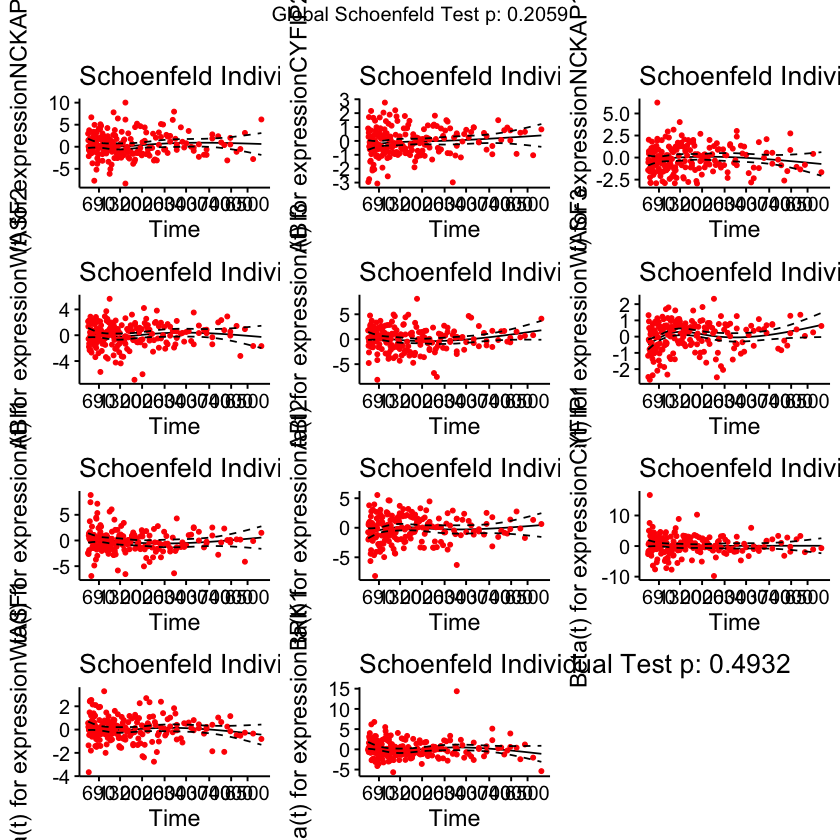

In [123]:
ggcoxzph(test.ph) #it's supposed to be independant of time

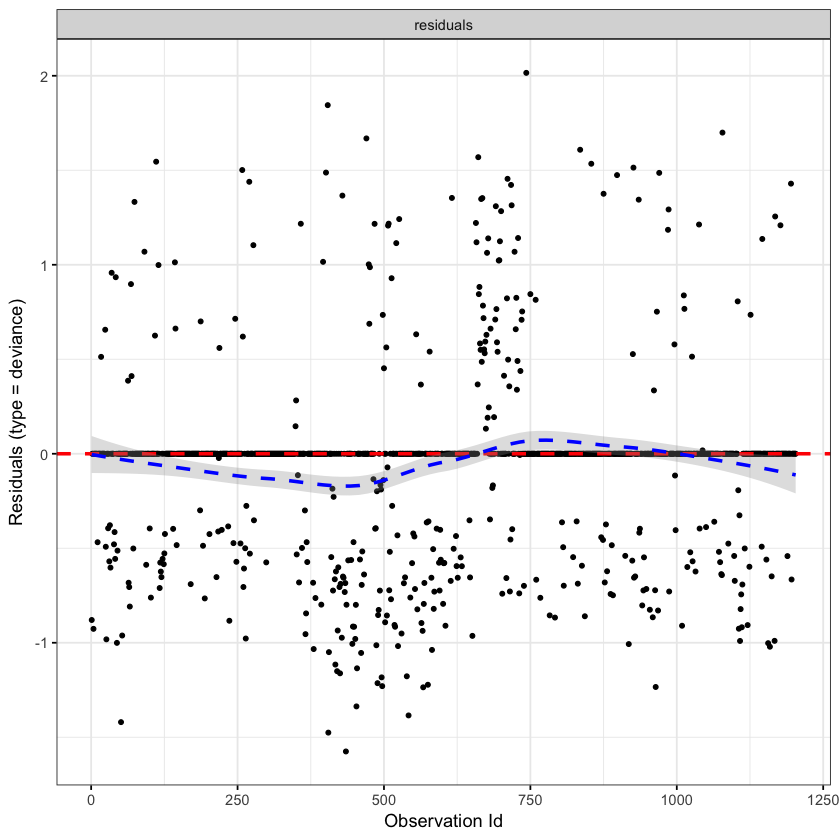

In [109]:
ggcoxdiagnostics(res.cox2, type = "deviance",
                 linear.predictions = FALSE, ggtheme = theme_bw()) # another diagnosis (blue line should be horizontal)

Warning message:
“arguments formula is deprecated; will be removed in the next version; please use fit instead.”

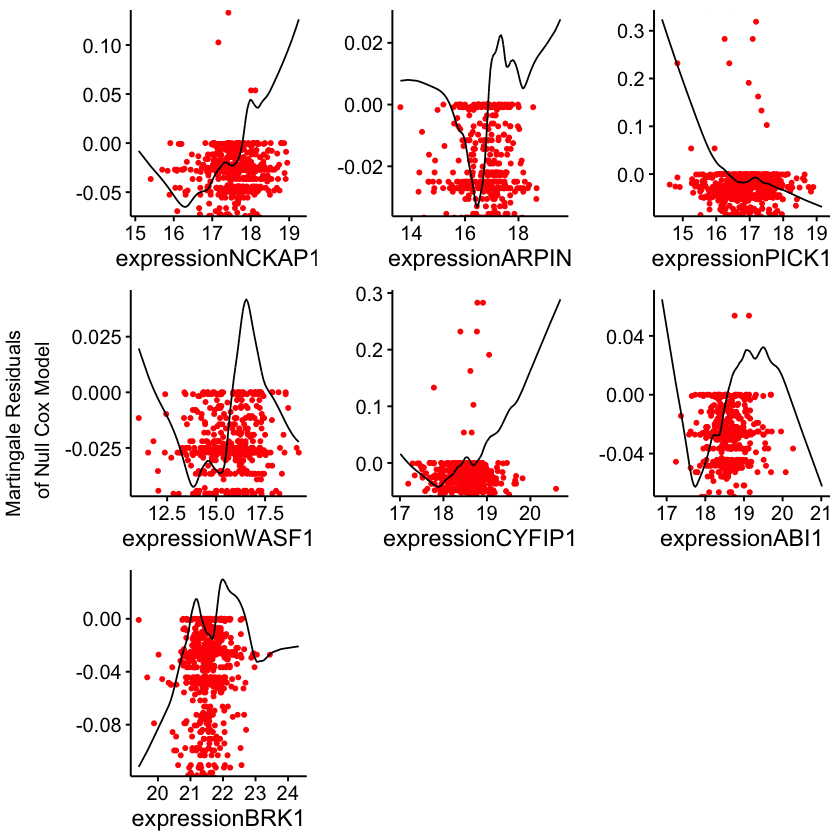

In [79]:
# test the linearity hypothesis (not sure how to interpret)
ggcoxfunctional(Surv(survival, event) ~ expressionNCKAP1 + expressionARPIN + expressionPICK1 + expressionWASF1 + expressionCYFIP1 + expressionABI1 + expressionBRK1, fit=fit, data = df)

# Plot KM for the most significant parameter

##### Find the optimal cut-off for KM plot

In [155]:
df.cut <- surv_cutpoint(
   df,
   time = "survival",
   event = "event",
   variables = c("expressionNCKAP1")
)


In [161]:
summary(df.cut)

,cutpoint,statistic
expressionNCKAP1,18.01,3.375964


In [162]:
df.cat <- surv_categorize(df.cut) 

###### Make the KM plot

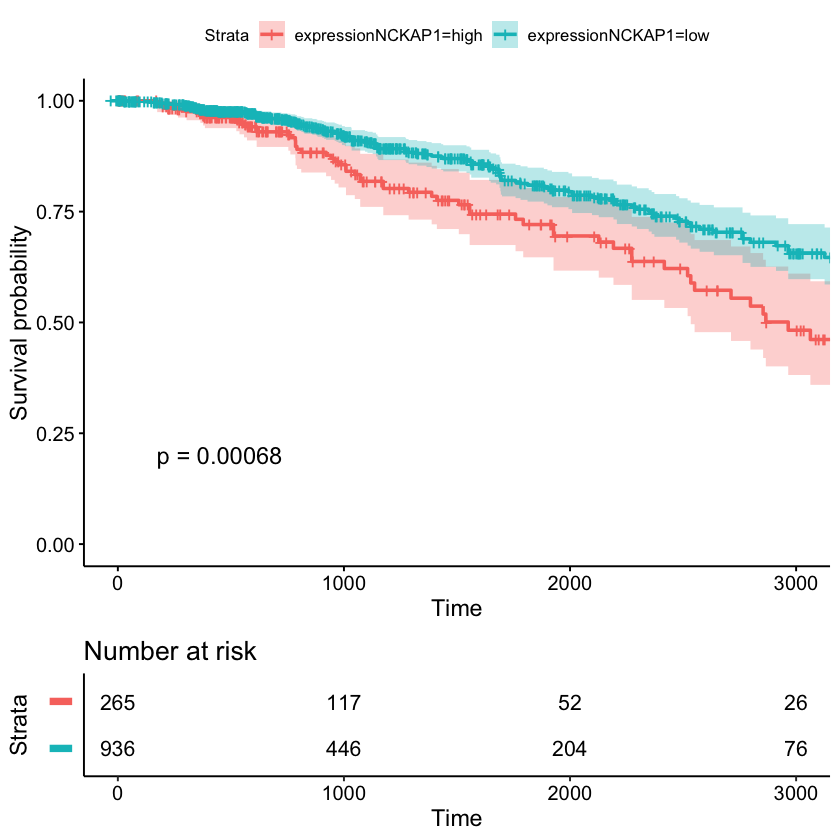

In [164]:
fit <- survfit(Surv(survival, event) ~ expressionNCKAP1,
               data = df.cat)
ggsurvplot(
   fit,                     # survfit object with calculated statistics.
   risk.table = TRUE,       # show risk table.
   pval = TRUE,             # show p-value of log-rank test.
   conf.int = TRUE,         # show confidence intervals for 
                            # point estimaes of survival curves.
   xlim = c(0,3000),        # present narrower X axis, but not affect
                            # survival estimates.
   break.time.by = 1000,    # break X axis in time intervals by 500.
                             # customize plot and risk table with a theme.
 risk.table.y.text.col = T, # colour risk table text annotations.
  risk.table.y.text = FALSE # show bars instead of names in text annotations
                            # in legend of risk table
)